In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
train = pd.read_csv('twitter_training.csv', names=['ID','Topic','Sentiment','Text'])

In [6]:
cols = ['ID','Topic','Sentiment','Text']

In [7]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
train.shape

(74682, 4)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
train.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,Microsoft,Negative,
freq,2400,22542,172


In [11]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [12]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [13]:
train.dropna(inplace=True)

In [14]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [15]:
train.duplicated().sum()

np.int64(2340)

In [16]:
train.drop_duplicates(inplace=True)


In [17]:
train.duplicated().sum()

np.int64(0)

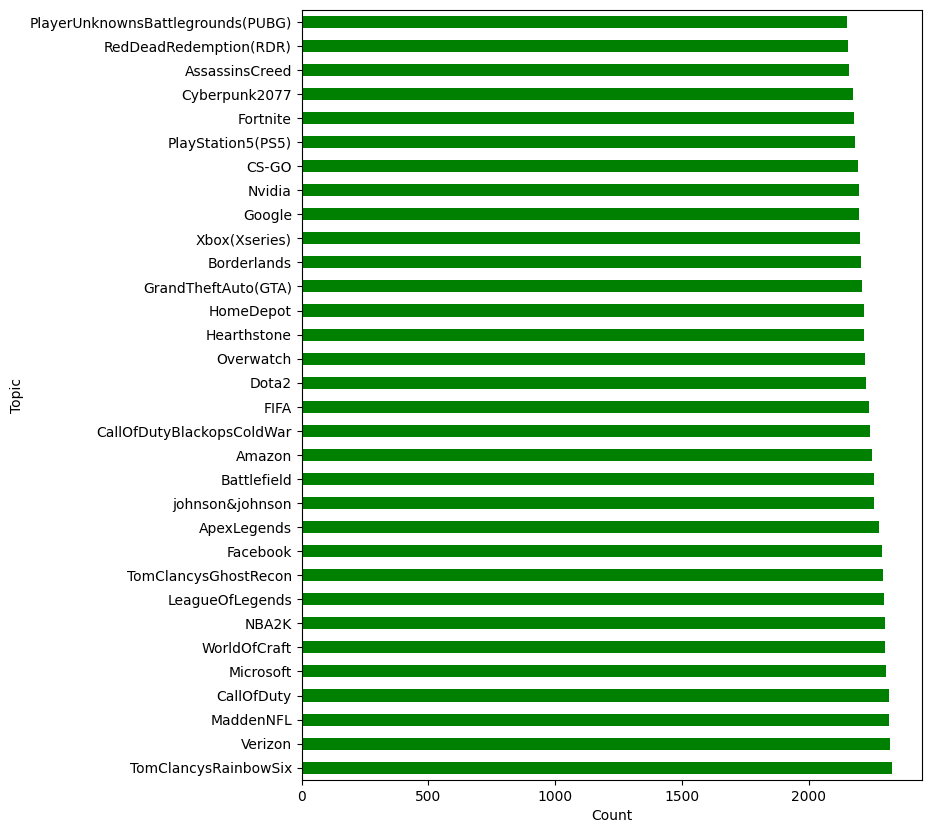

In [18]:
plt.figure(figsize=(8,10))
train['Topic'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

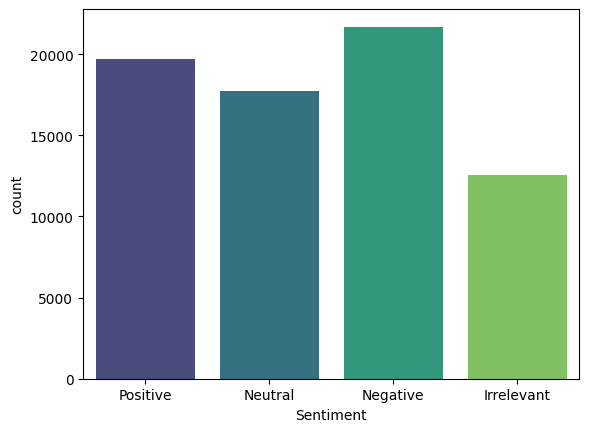

In [20]:
sns.countplot(x = 'Sentiment', data=train, hue= 'Sentiment', palette='viridis', legend=False)
plt.show()

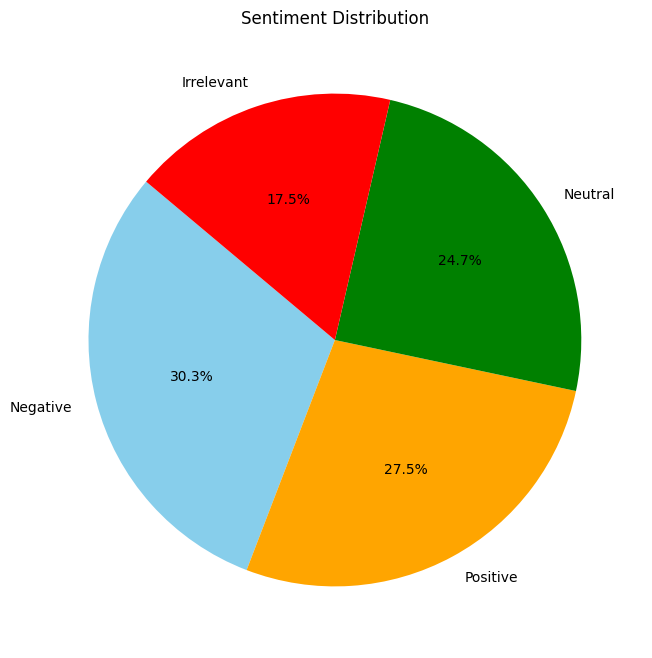

In [22]:
#Calculate the counts for each sentiment
SentimentCounts = train['Sentiment'].value_counts()

#create pie chart
plt.figure(figsize=(8,8))
plt.pie(SentimentCounts, labels=SentimentCounts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue','orange','green','red','purple'])
plt.title('Sentiment Distribution')

plt.show()


In [23]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


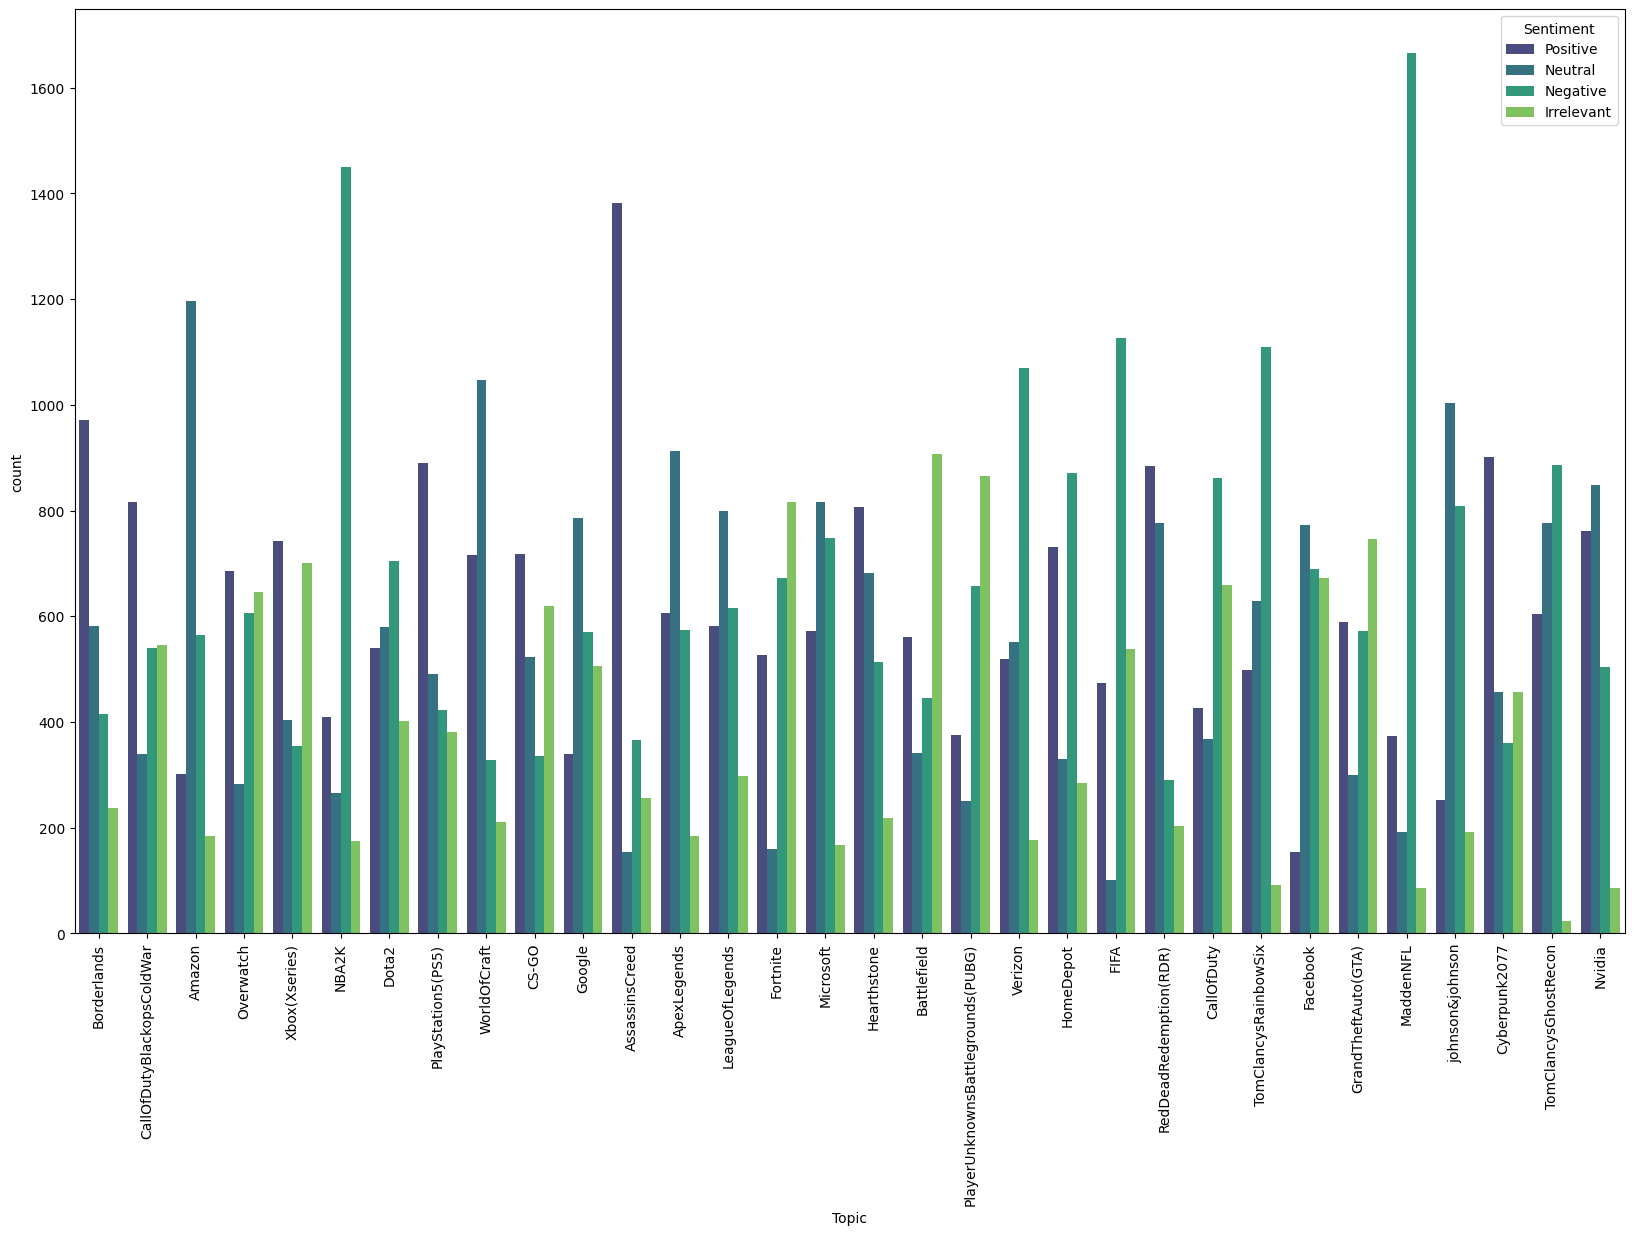

In [24]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=train,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [25]:
#group by Topic and Sentiment
TopicWiseSentiment= train.groupby(["Topic","Sentiment"]).size().reset_index(name='Count')

#Select top 5 topics
TopicCounts = train['Topic'].value_counts().nlargest(5).index

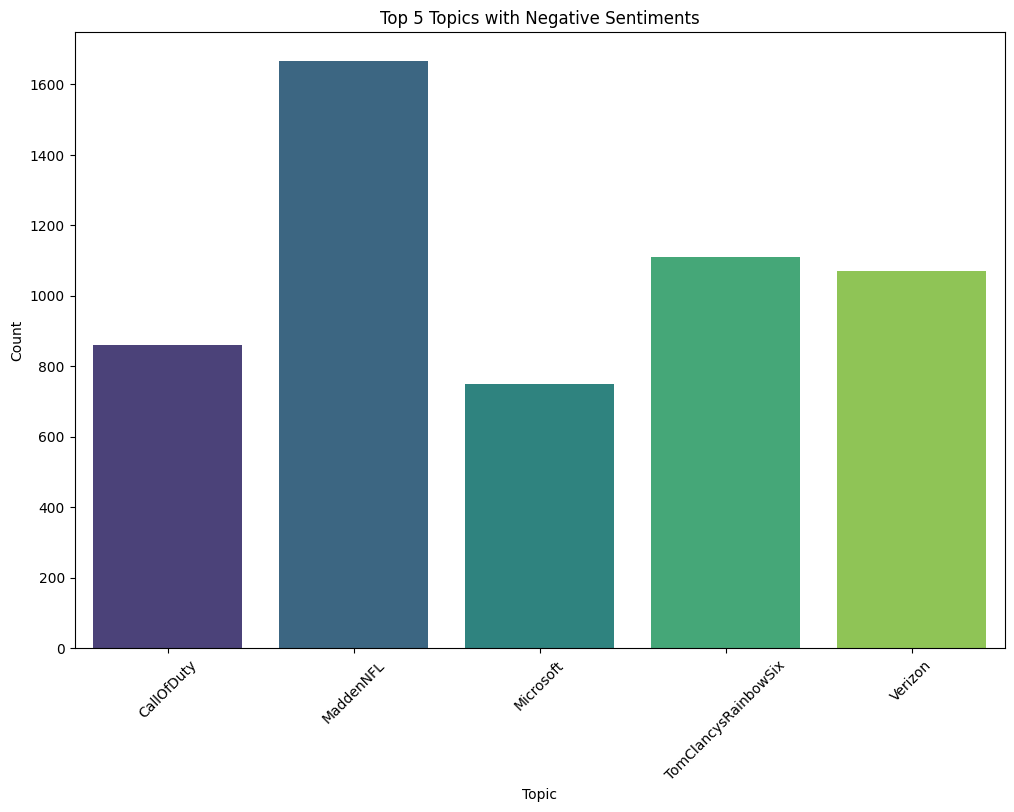

In [29]:
TopTopicsSentiments = TopicWiseSentiment[TopicWiseSentiment['Topic'].isin(TopicCounts)]
plt.figure(figsize=(12,8))
sns.barplot(data=TopTopicsSentiments[TopTopicsSentiments['Sentiment']=='Negative'], x='Topic', y='Count',hue='Topic', palette='viridis', legend=False)
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

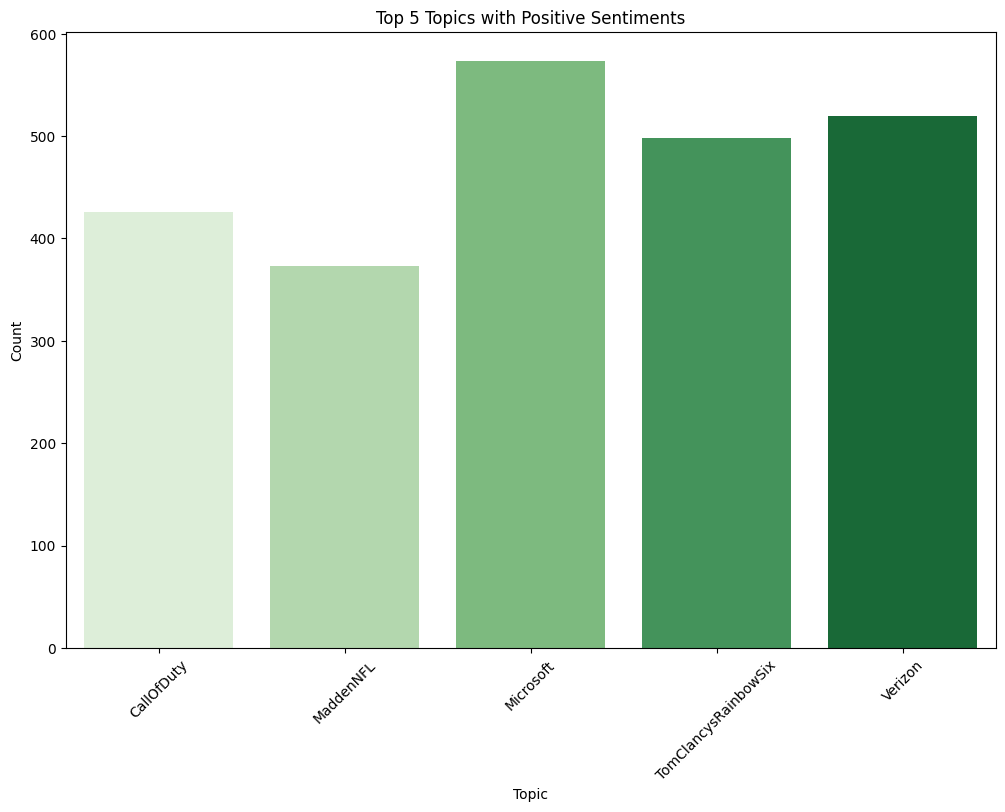

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(data=TopTopicsSentiments[TopTopicsSentiments['Sentiment']=='Positive'], x='Topic', y='Count',hue='Topic', palette='Greens', legend=False)
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


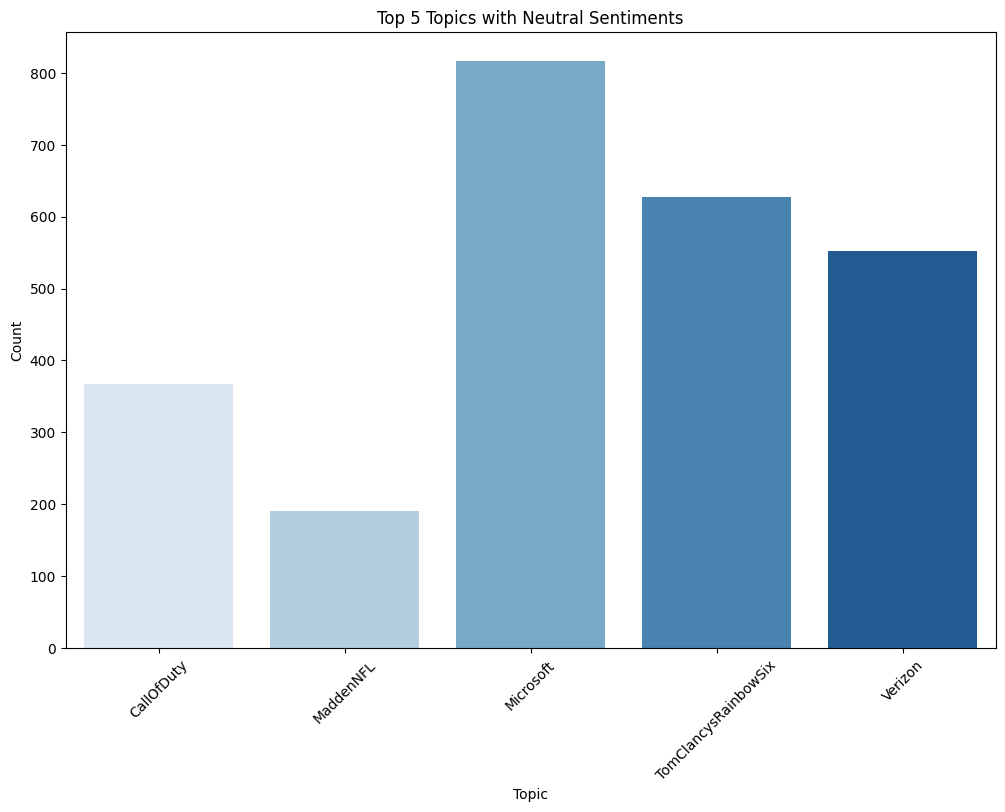

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(data=TopTopicsSentiments[TopTopicsSentiments['Sentiment']=='Neutral'], x='Topic', y='Count',hue='Topic', palette='Blues', legend=False)
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


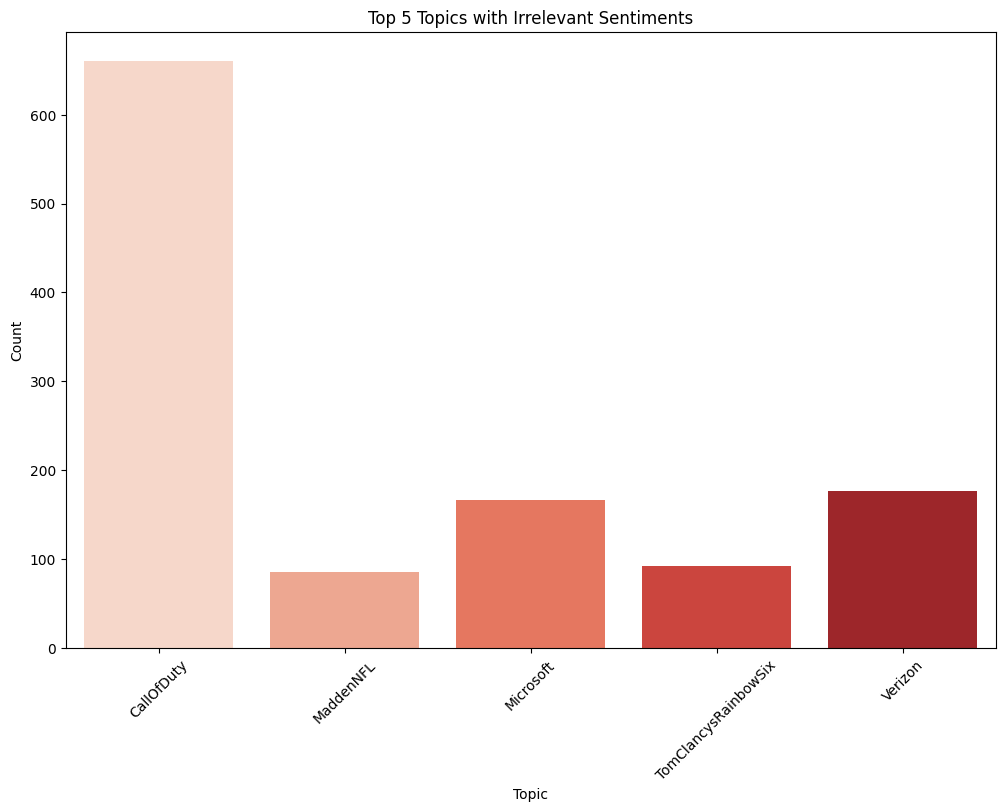

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(data=TopTopicsSentiments[TopTopicsSentiments['Sentiment']=='Irrelevant'], x='Topic', y='Count',hue='Topic', palette='Reds', legend=False)
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

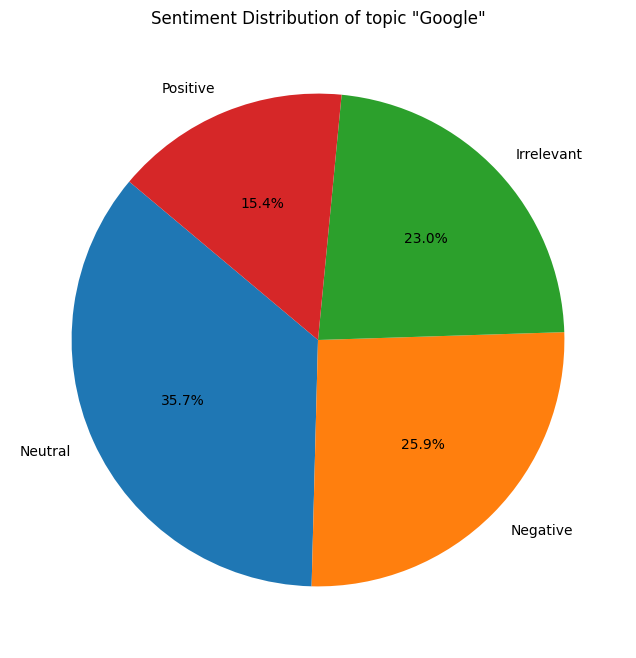

In [34]:
#Filter the dataset to include only entries related to the topic 'Google'
GoogleData = train[train['Topic']=='Google']

#Count the occurences of each sentiment within the filtered dataset
SentimentCounts = GoogleData['Sentiment'].value_counts()

#Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(SentimentCounts, labels=SentimentCounts.index, autopct="%1.1f%%", startangle=140)
plt.title('Sentiment Distribution of topic "Google"')
plt.show()


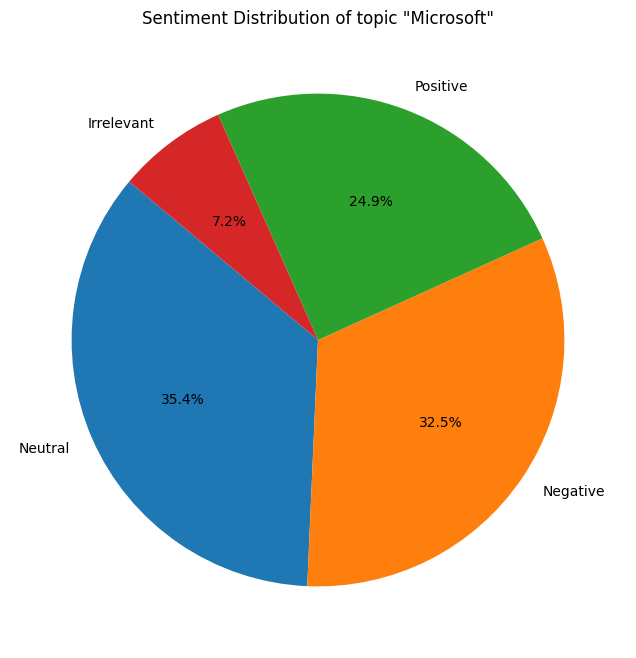

In [35]:
#Filter the dataset to include only entries related to the topic 'Google'
MsData = train[train['Topic']=='Microsoft']

#Count the occurences of each sentiment within the filtered dataset
SentimentCounts = MsData['Sentiment'].value_counts()

#Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(SentimentCounts, labels=SentimentCounts.index, autopct="%1.1f%%", startangle=140)
plt.title('Sentiment Distribution of topic "Microsoft"')
plt.show()


In [36]:
train['msg_len'] = train['Text'].apply(len)

In [37]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


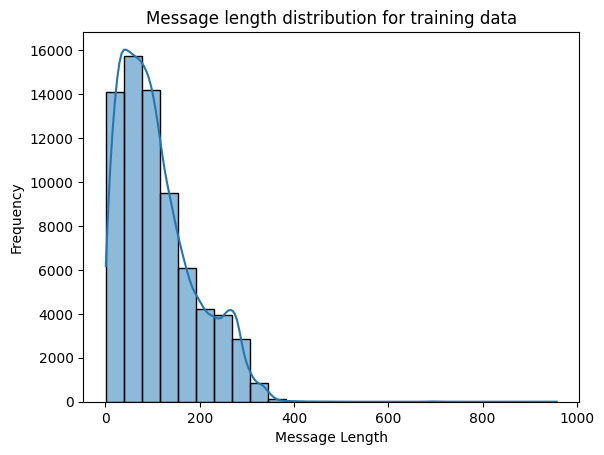

In [39]:
sns.histplot(train['msg_len'], bins=25, kde=True)
plt.title('Message length distribution for training data')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

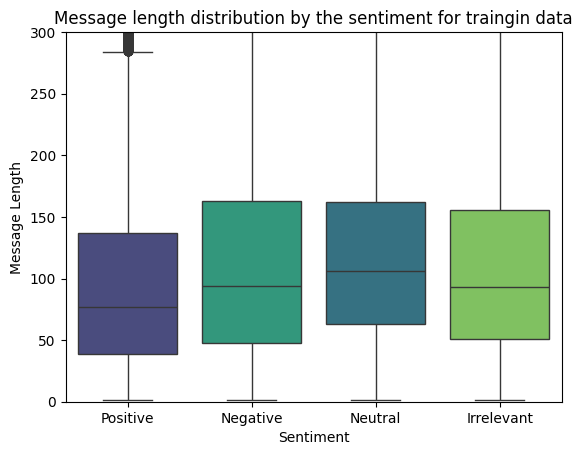

In [40]:
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len', palette='viridis',hue=train['Sentiment'], legend=False, order=['Positive','Negative','Neutral','Irrelevant'])
plt.title("Message length distribution by the sentiment for traingin data")
plt.xlabel('Sentiment')
plt.ylabel('Message Length')
plt.ylim(0,300)
plt.show()

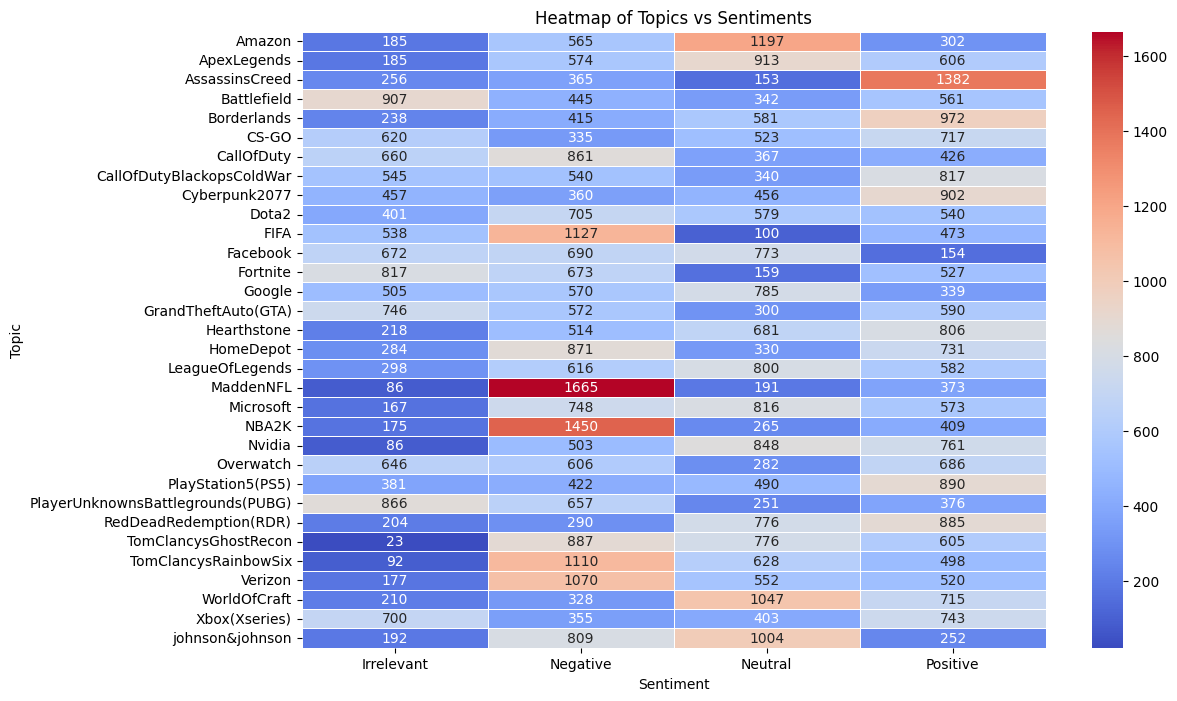

In [41]:
#Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

#plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d',linewidths=0.5)

#Add labels and title
plt.title('Heatmap of Topics vs Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

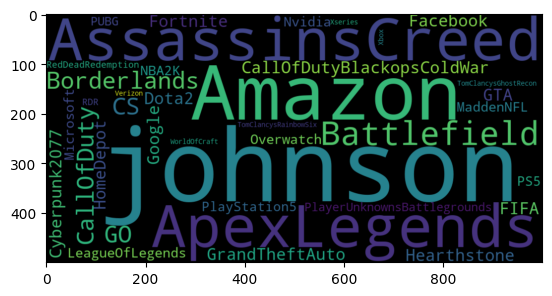

In [42]:
topic_list = ' '.join(crosstab.index)
wc = WordCloud(width=1000, height=500).generate(topic_list)
plt.imshow(wc, interpolation='bilinear')

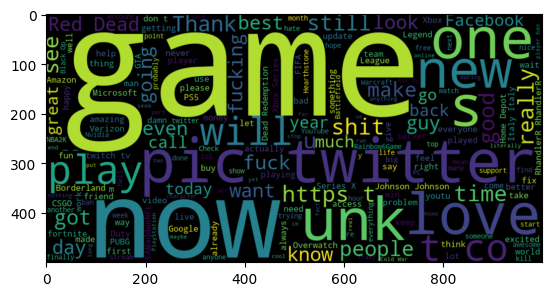

In [43]:
corpus = ' '.join(train['Text'])
wc2 = WordCloud(width=1000, height=500).generate(corpus)
plt.imshow(wc2, interpolation='bilinear')